In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [179]:
raw = pd.read_csv('ipo_acq_1.csv')

In [150]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 32 columns):
Unnamed: 0           7503 non-null int64
id                   7503 non-null object
category_code        7503 non-null object
status               7503 non-null object
state_code           7503 non-null object
city_x               7503 non-null object
region               7503 non-null object
relationships        7503 non-null int64
Berkeley             7503 non-null int64
Stanford             7503 non-null int64
CMU                  7503 non-null int64
Harvard              7503 non-null int64
MIT                  7503 non-null int64
MBA                  7503 non-null int64
PhD                  7503 non-null int64
CompSci              7503 non-null int64
yrs_of_experience    7503 non-null int64
city_y               7503 non-null int64
success              7503 non-null int64
with_Apple           7503 non-null int64
with_Google          7503 non-null int64
with_Facebook        7503 

In [180]:
success={'acquired':int(1),
        'closed':int(0),
        'ipo':int(1),
        'operating':int(0)}

raw['success'] = raw['status'].map(success)

In [ ]:
raw['success'] 

In [152]:
list(raw.category_code.unique())

['web',
 'mobile',
 'health',
 'cleantech',
 'analytics',
 'enterprise',
 'games_video',
 'software',
 'ecommerce',
 'security',
 'network_hosting',
 'advertising',
 'photo_video',
 'finance',
 'public_relations',
 'transportation',
 'travel',
 'hospitality',
 'biotech',
 'social',
 'search',
 'messaging',
 'education',
 'fashion',
 'medical',
 'consulting',
 'other',
 'music',
 'hardware',
 'sports',
 'nonprofit',
 'design',
 'legal',
 'real_estate',
 'news',
 'automotive',
 'nanotech',
 'manufacturing',
 'semiconductor',
 'local',
 'pets',
 'government']

In [181]:
raw["category_code"] = raw["category_code"].astype(dtype='category')
raw['state_code'] = raw["state_code"].astype(dtype='category')

In [100]:
pd.get_dummies(raw["category_code"],prefix='cat').head(4)

,cat_advertising,cat_analytics,cat_automotive,cat_biotech,cat_cleantech,cat_consulting,cat_design,cat_ecommerce,cat_education,cat_enterprise,...,cat_real_estate,cat_search,cat_security,cat_semiconductor,cat_social,cat_software,cat_sports,cat_transportation,cat_travel,cat_web
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
raw = pd.concat([raw,pd.get_dummies(raw["category_code"],prefix='cat')],axis=1)

In [183]:
raw = pd.concat([raw,pd.get_dummies(raw["state_code"],prefix='state')],axis=1)

In [184]:
raw['yrs_of_experience'] = pd.cut(raw['yrs_of_experience'], bins=[0,50,100,np.inf], include_lowest=True,labels=['0-50','50-100','>100'])

In [185]:
raw['yrs_of_experience'] = raw['yrs_of_experience'].astype(dtype='category')

In [186]:
raw = pd.concat([raw,pd.get_dummies(raw["yrs_of_experience"],prefix='Exp')],axis=1)

In [188]:
#raw.head()

,Unnamed: 0,id,category_code,status,state_code,city_x,region,relationships,Berkeley,Stanford,CMU,Harvard,MIT,MBA,PhD,CompSci,yrs_of_experience,city_y,success,with_Apple,with_Google,with_Facebook,with_Twitter,with_Microsoft,with_Amazon,with_eBay,with_Yahoo,with_IBM,with_LinkedIn,object_id,angel,series-a,cat_advertising,cat_analytics,cat_automotive,cat_biotech,cat_cleantech,cat_consulting,cat_design,cat_ecommerce,cat_education,cat_enterprise,cat_fashion,cat_finance,cat_games_video,cat_government,cat_hardware,cat_health,cat_hospitality,cat_legal,cat_local,cat_manufacturing,cat_medical,cat_messaging,cat_mobile,cat_music,cat_nanotech,cat_network_hosting,cat_news,cat_nonprofit,cat_other,cat_pets,cat_photo_video,cat_public_relations,cat_real_estate,cat_search,cat_security,cat_semiconductor,cat_social,cat_software,cat_sports,cat_transportation,cat_travel,cat_web,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,Exp_0-50,Exp_50-100,Exp_>100
0,0,c:1,web,operating,WA,Seattle,Seattle,17,1,1,0,1,0,1,1,1,>100,2,0,0,0,0,0,0,0,0,0,0,0,c:1,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,c:1001,web,acquired,CA,Mountain View,SF Bay,14,1,1,1,0,0,0,0,1,50-100,1,1,0,1,0,0,0,0,0,0,0,0,c:1001,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,c:10014,mobile,acquired,CA,Palo Alto,SF Bay,9,0,0,0,0,0,0,1,1,0-50,1,1,0,0,0,0,0,0,0,0,0,0,c:10014,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,c:10015,health,operating,CA,San Francisco,SF Bay,14,0,0,0,1,1,0,0,1,50-100,1,0,0,0,0,0,0,0,0,0,0,0,c:10015,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,c:100155,cleantech,operating,TX,Austin,Austin,6,0,0,0,0,0,0,0,0,0-50,1,0,0,0,0,0,0,0,0,0,0,0,c:100155,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [103]:
#list(raw.columns)

['Unnamed: 0',
 'id',
 'category_code',
 'status',
 'state_code',
 'city_x',
 'region',
 'relationships',
 'Berkeley',
 'Stanford',
 'CMU',
 'Harvard',
 'MIT',
 'MBA',
 'PhD',
 'CompSci',
 'yrs_of_experience',
 'city_y',
 'success',
 'with_Apple',
 'with_Google',
 'with_Facebook',
 'with_Twitter',
 'with_Microsoft',
 'with_Amazon',
 'with_eBay',
 'with_Yahoo',
 'with_IBM',
 'with_LinkedIn',
 'object_id',
 'angel',
 'series-a',
 'cat_advertising',
 'cat_analytics',
 'cat_automotive',
 'cat_biotech',
 'cat_cleantech',
 'cat_consulting',
 'cat_design',
 'cat_ecommerce',
 'cat_education',
 'cat_enterprise',
 'cat_fashion',
 'cat_finance',
 'cat_games_video',
 'cat_government',
 'cat_hardware',
 'cat_health',
 'cat_hospitality',
 'cat_legal',
 'cat_local',
 'cat_manufacturing',
 'cat_medical',
 'cat_messaging',
 'cat_mobile',
 'cat_music',
 'cat_nanotech',
 'cat_network_hosting',
 'cat_news',
 'cat_nonprofit',
 'cat_other',
 'cat_pets',
 'cat_photo_video',
 'cat_public_relations',
 'cat_rea

In [169]:
#raw.head(1)

,Unnamed: 0,id,category_code,status,state_code,city_x,region,relationships,Berkeley,Stanford,CMU,Harvard,MIT,MBA,PhD,CompSci,yrs_of_experience,city_y,success,with_Apple,with_Google,with_Facebook,with_Twitter,with_Microsoft,with_Amazon,with_eBay,with_Yahoo,with_IBM,with_LinkedIn,object_id,angel,series-a,cat_advertising,cat_analytics,cat_automotive,cat_biotech,cat_cleantech,cat_consulting,cat_design,cat_ecommerce,cat_education,cat_enterprise,cat_fashion,cat_finance,cat_games_video,cat_government,cat_hardware,cat_health,cat_hospitality,cat_legal,cat_local,cat_manufacturing,cat_medical,cat_messaging,cat_mobile,cat_music,cat_nanotech,cat_network_hosting,cat_news,cat_nonprofit,cat_other,cat_pets,cat_photo_video,cat_public_relations,cat_real_estate,cat_search,cat_security,cat_semiconductor,cat_social,cat_software,cat_sports,cat_transportation,cat_travel,cat_web,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,Exp_0-50,Exp_50-100,Exp_>100
0,0,c:1,web,operating,WA,Seattle,Seattle,17,1,1,0,1,0,1,1,1,>100,2,0,0,0,0,0,0,0,0,0,0,0,c:1,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [280]:
raw2 = raw.copy()

In [281]:
raw2.drop(['Unnamed: 0','city_x','id','category_code','status',
          'relationships','region','state_code','object_id',
          'angel','series-a','yrs_of_experience'], axis=1, inplace=True)

In [263]:
#raw2.info(max_cols=50000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 114 columns):
Berkeley                7503 non-null int64
Stanford                7503 non-null int64
CMU                     7503 non-null int64
Harvard                 7503 non-null int64
MIT                     7503 non-null int64
MBA                     7503 non-null int64
PhD                     7503 non-null int64
CompSci                 7503 non-null int64
city_y                  7503 non-null int64
success                 7503 non-null int64
with_Apple              7503 non-null int64
with_Google             7503 non-null int64
with_Facebook           7503 non-null int64
with_Twitter            7503 non-null int64
with_Microsoft          7503 non-null int64
with_Amazon             7503 non-null int64
with_eBay               7503 non-null int64
with_Yahoo              7503 non-null int64
with_IBM                7503 non-null int64
with_LinkedIn           7503 non-null int64
cat_advertis

In [264]:
#raw2.head()

,Berkeley,Stanford,CMU,Harvard,MIT,MBA,PhD,CompSci,city_y,success,with_Apple,with_Google,with_Facebook,with_Twitter,with_Microsoft,with_Amazon,with_eBay,with_Yahoo,with_IBM,with_LinkedIn,cat_advertising,cat_analytics,cat_automotive,cat_biotech,cat_cleantech,cat_consulting,cat_design,cat_ecommerce,cat_education,cat_enterprise,cat_fashion,cat_finance,cat_games_video,cat_government,cat_hardware,cat_health,cat_hospitality,cat_legal,cat_local,cat_manufacturing,cat_medical,cat_messaging,cat_mobile,cat_music,cat_nanotech,cat_network_hosting,cat_news,cat_nonprofit,cat_other,cat_pets,cat_photo_video,cat_public_relations,cat_real_estate,cat_search,cat_security,cat_semiconductor,cat_social,cat_software,cat_sports,cat_transportation,cat_travel,cat_web,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,Exp_0-50,Exp_50-100,Exp_>100
0,1,1,0,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [282]:
# stratified data split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(raw2, raw2['success']):
    
    train_set = raw2.loc[train_index]
    test_set = raw2.loc[test_index]

In [283]:
# check stratification 
test_set['success'].value_counts() / len(test_set)

0    0.824117
1    0.175883
Name: success, dtype: float64

In [284]:
train_set['success'].value_counts() / len(train_set)

0    0.823725
1    0.176275
Name: success, dtype: float64

# ML models

In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class = 'auto')

svm_clf = SVC(gamma='scale', random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)

rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1,random_state=42, class_weight={0:1, 1:100})

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('svc',svm_clf),('tr',tree_clf),('rf',rnd_clf)], voting='hard')

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2), n_estimators=500, algorithm='SAMME.R', learning_rate=0.01)

In [334]:

# checking the accuracy of each classifier

from sklearn.metrics import confusion_matrix

for clf in (log_clf, svm_clf, tree_clf,rnd_clf,voting_clf,ada_clf):
    
    clf.fit(x,y.ravel())
    y_pred = clf.predict(test_x)
    print(clf.__class__.__name__,": ",accuracy_score(test_y.ravel(),y_pred))
    print("Conf_mat:") 
    print(confusion_matrix(test_y, y_pred))
    print("")

/Users/rajarathnambalakrishnan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression :  0.8241172551632245
Conf_mat:
[[1232    5]
 [ 259    5]]

SVC :  0.8247834776815456
Conf_mat:
[[1237    0]
 [ 263    1]]

DecisionTreeClassifier :  0.7674883411059293
Conf_mat:
[[1115  122]
 [ 227   37]]

RandomForestClassifier :  0.6449033977348434
Conf_mat:
[[876 361]
 [172  92]]



/Users/rajarathnambalakrishnan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


VotingClassifier :  0.8254497001998667
Conf_mat:
[[1236    1]
 [ 261    3]]

AdaBoostClassifier :  0.8241172551632245
Conf_mat:
[[1236    1]
 [ 263    1]]



# cross-validation

In [332]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x, y, cv = 10, scoring = 'accuracy')

array([0.82529118, 0.82196339, 0.82529118, 0.81863561, 0.825     ,
       0.825     , 0.82333333, 0.82      , 0.8230384 , 0.82804674])

In [312]:
from sklearn.ensemble import GradientBoostingClassifier 

gbc = GradientBoostingClassifier(max_depth = 1 ,n_estimators = 112 ,learning_rate = 1 ) 
gbc.fit(x,y.ravel())
y_pred = clf.predict(test_x)
print(gbc.__class__.__name__,": ",accuracy_score(test_y.ravel(),y_pred))
print("Conf_mat:") 
print(confusion_matrix(test_y, y_pred))
print("")


GradientBoostingClassifier :  0.8241172551632245
Conf_mat:
[[1236    1]
 [ 263    1]]



In [317]:
import sklearn
weight = sklearn.utils.class_weight.compute_class_weight(class_weight='balanced', classes= np.unique(y), y=y)

array([0.60699838, 2.83648393])

In [318]:
np.unique(y)

array([0, 1])

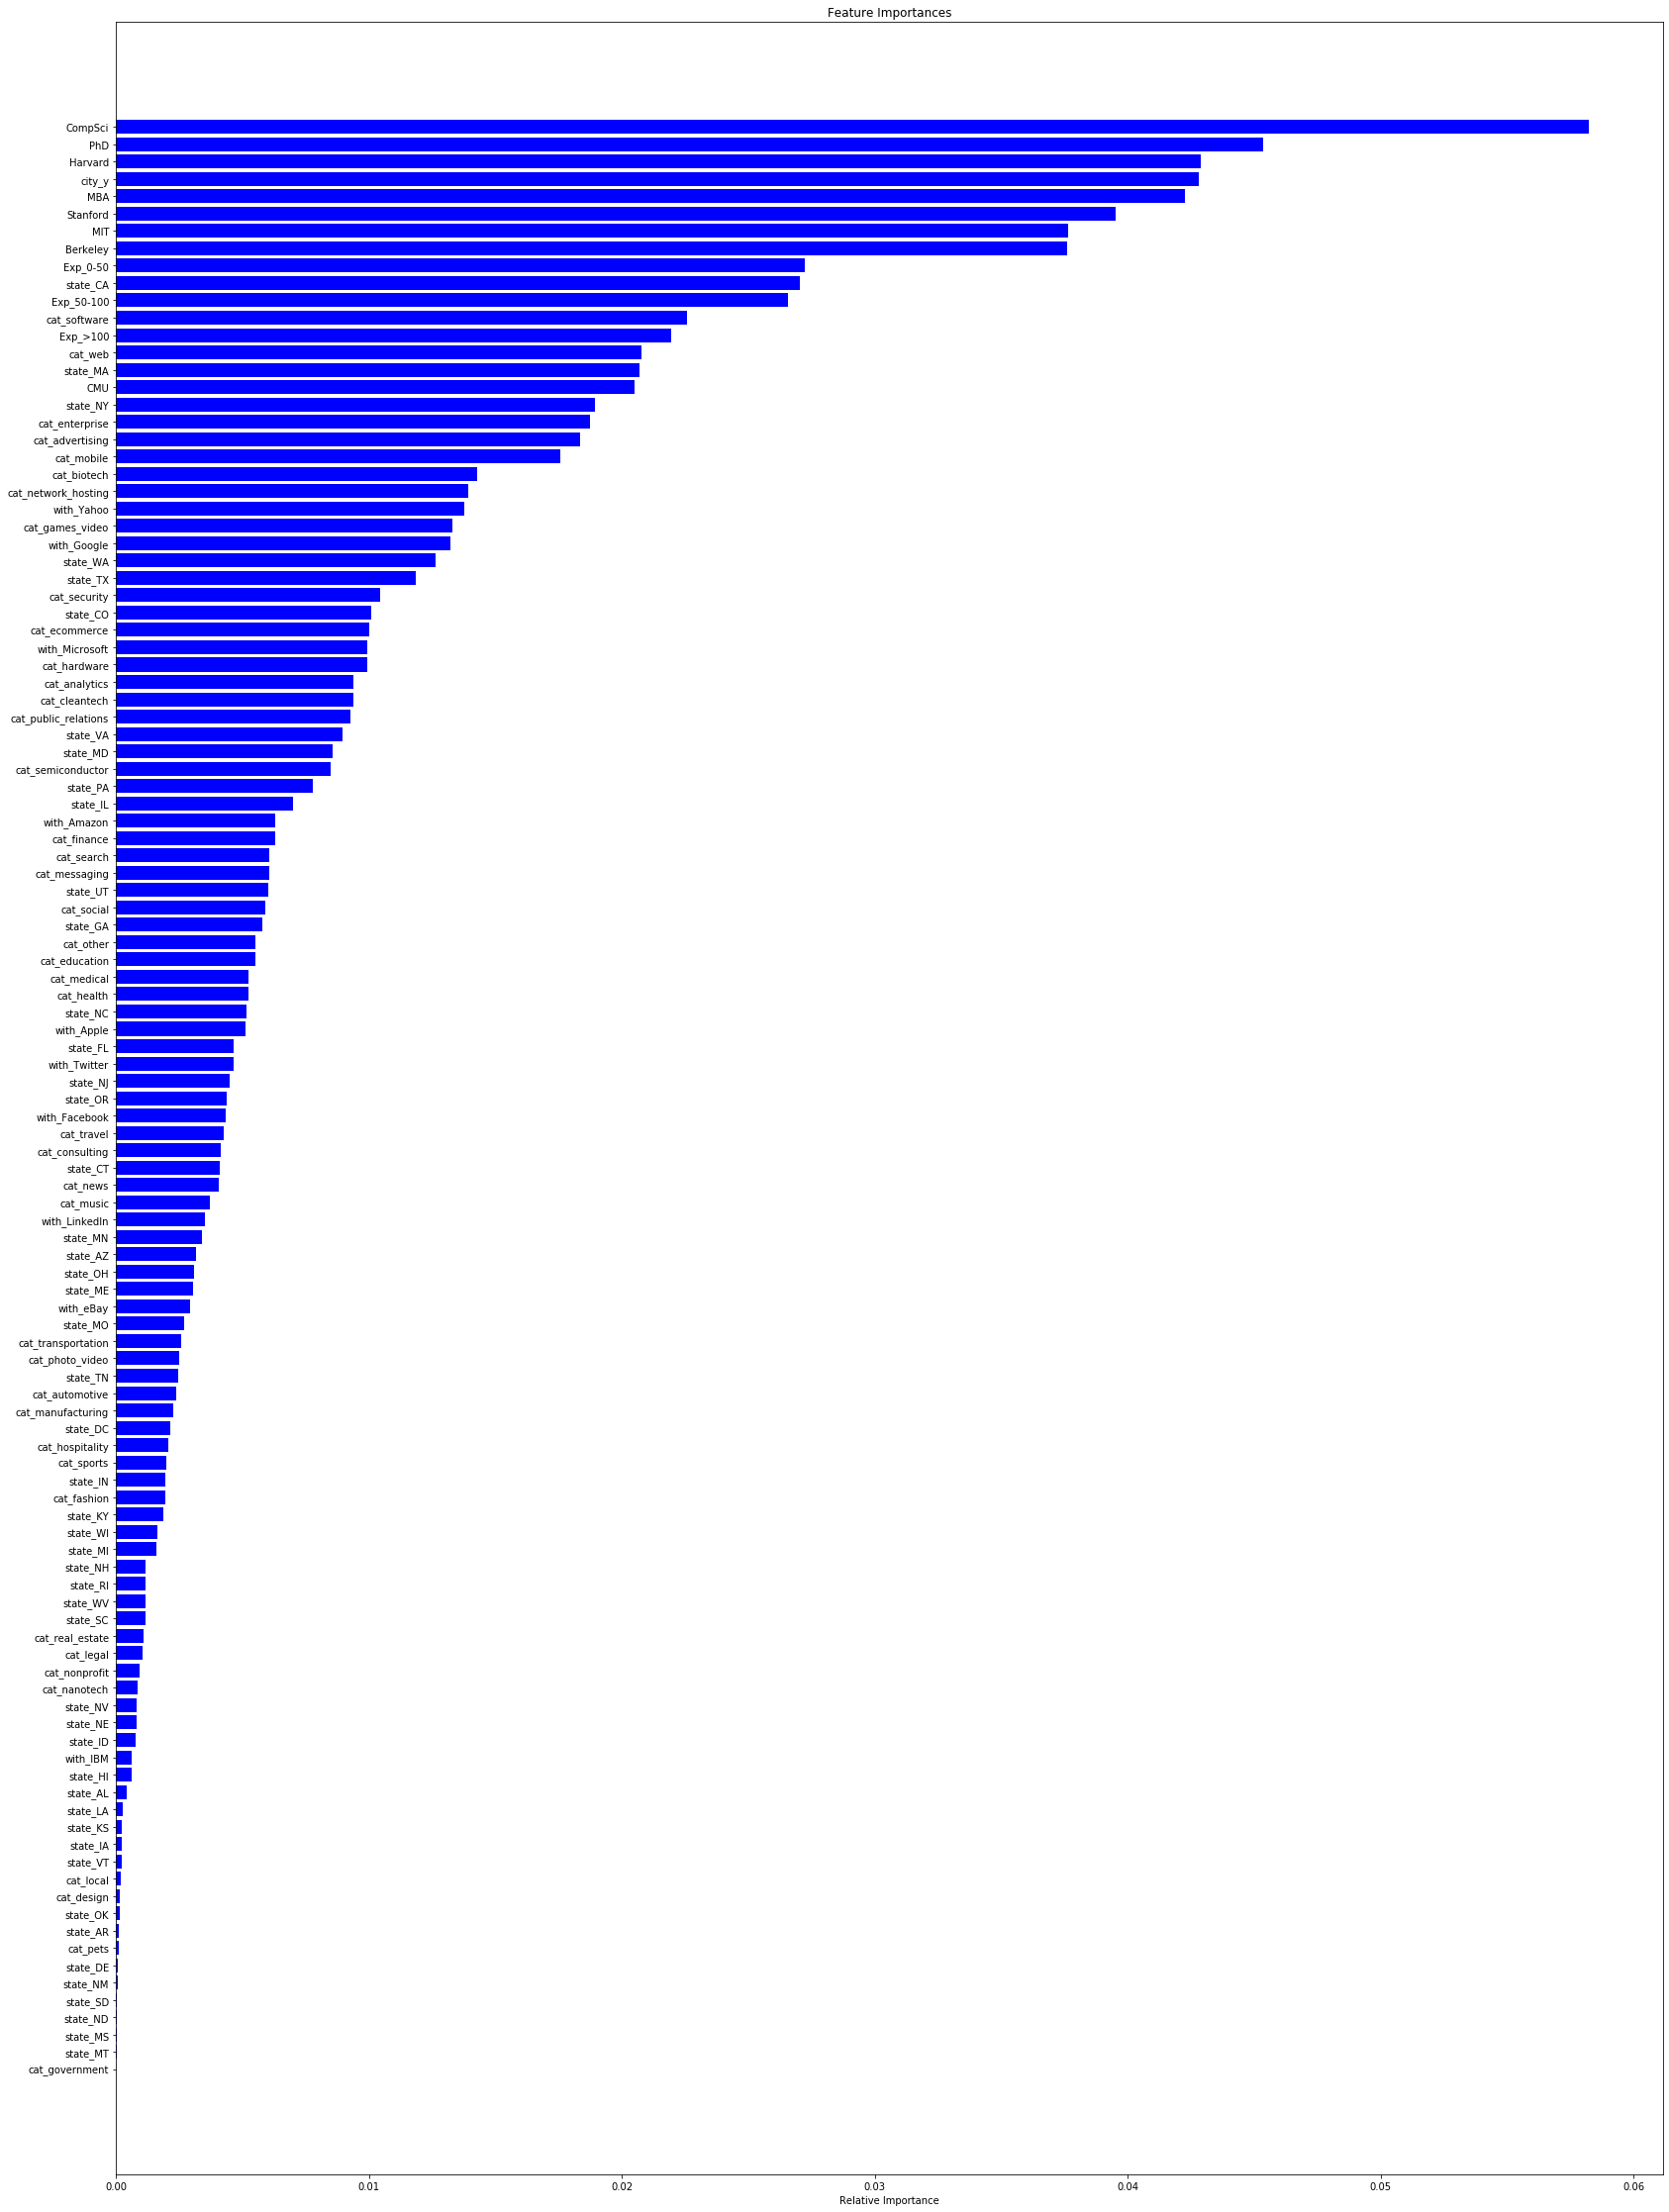

In [232]:
features = x.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(28,40))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('feature_importances.png')
plt.show()


In [233]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [277]:
y_pred = sgd_clf.predict(test_x)
print(sgd_clf.__class__.__name__,": ",accuracy_score(test_y.ravel(),y_pred))
print("Conf_mat:") 
print(confusion_matrix(test_y, y_pred))
print("")

SGDClassifier :  0.8167888074616922
Conf_mat:
[[1225   12]
 [ 263    1]]



# Neural Net 

In [235]:
import keras
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


In [307]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(x.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='softmax'))

In [260]:
val_y.head(2)

7       0.0
1042    NaN
Name: success, dtype: float64

In [308]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

In [310]:
history = model.fit(x,y.ravel(),
                    epochs=5,
                    batch_size=32, 
                    validation_data=(test_x, test_y.ravel()))

Train on 6002 samples, validate on 1501 samples
Epoch 1/5
6002/6002 [==============================] - 0s 30us/step - loss: 12.6304 - accuracy: 0.1763 - val_loss: 12.5672 - val_accuracy: 0.1759
Epoch 2/5
6002/6002 [==============================] - 0s 28us/step - loss: 12.6304 - accuracy: 0.1763 - val_loss: 12.5672 - val_accuracy: 0.1759
Epoch 3/5
6002/6002 [==============================] - 0s 28us/step - loss: 12.6304 - accuracy: 0.1763 - val_loss: 12.5672 - val_accuracy: 0.1759
Epoch 4/5
6002/6002 [==============================] - 0s 29us/step - loss: 12.6304 - accuracy: 0.1763 - val_loss: 12.5672 - val_accuracy: 0.1759
Epoch 5/5
6002/6002 [==============================] - 0s 28us/step - loss: 12.6304 - accuracy: 0.1763 - val_loss: 12.5672 - val_accuracy: 0.1759


In [296]:
x.to_numpy(dtype=int)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [297]:
x

,Berkeley,Stanford,CMU,Harvard,MIT,MBA,PhD,CompSci,city_y,with_Apple,with_Google,with_Facebook,with_Twitter,with_Microsoft,with_Amazon,with_eBay,with_Yahoo,with_IBM,with_LinkedIn,cat_advertising,cat_analytics,cat_automotive,cat_biotech,cat_cleantech,cat_consulting,cat_design,cat_ecommerce,cat_education,cat_enterprise,cat_fashion,cat_finance,cat_games_video,cat_government,cat_hardware,cat_health,cat_hospitality,cat_legal,cat_local,cat_manufacturing,cat_medical,cat_messaging,cat_mobile,cat_music,cat_nanotech,cat_network_hosting,cat_news,cat_nonprofit,cat_other,cat_pets,cat_photo_video,cat_public_relations,cat_real_estate,cat_search,cat_security,cat_semiconductor,cat_social,cat_software,cat_sports,cat_transportation,cat_travel,cat_web,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,Exp_0-50,Exp_50-100,Exp_>100
5179,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6201,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1526,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5925,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4040,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2504,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1804,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6534,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4992,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6532,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
